Import all the code. If you get import errors, review the installation proceedure. Make sure you are using the correct kernel. You will need to explicitly set up a kernel for the environment you've created. 

In [1]:
from smokedetectoroptimization.optimizer import (optimize, evaluate_optimization,
                                                 optimization_logger, evaluate_locations)
from smokedetectoroptimization.smoke_source import SmokeSource, smoke_logger
from smokedetectoroptimization.constants import (ALARM_THRESHOLD, FALSE_ALARM_THRESHOLD, 
                                                 SMOOTH_PLOTS, SINGLE_OBJECTIVE_FUNCTIONS_TTA,
                                                 SINGLE_OBJECTIVE_FUNCTIONS_MC)

In [2]:
import sys
# This is a hack, but it lets us import something from the folder above.
# I will address it at some point soon.
sys.path.append("..")
from constants import (SMOKE_FOLDERS, SMOKE_FOLDERS_LONG,
                       FALSE_ALARM_FOLDERS, NASA_DETECTORS, SOURCE_LOCATIONS)
print(SMOKE_FOLDERS_LONG)

['C:\\Users\\russe\\dev\\SmokeDetectorOptimization\\data\\bike_1000_steps', 'C:\\Users\\russe\\dev\\SmokeDetectorOptimization\\data\\laptop_1000_steps', 'C:\\Users\\russe\\dev\\SmokeDetectorOptimization\\data\\wall_computer_1000_steps']


The goal is to set the level of detail we get printed out. The smoke logger appears to be broken since it should display which directory it's loading from.

In [3]:
import logging
optimization_logger.setLevel(logging.ERROR)
smoke_logger.setLevel(logging.DEBUG)

This is simply a visualization style thing. It controls whether plots are interpolated, which is prettier, or whether they are dots, which is arguably more informative. Note, for this to have any effect, SMOOTH_PLOTS must be already imported

In [4]:
SMOOTH_PLOTS = True

Parameterization can be "xy", "yz", "xz", "xyz", or "phi_theta"  
Function type can be "multiobjective_competing", "multiobjective_counting", or "worst_case", which is the one we are used to. "fastest" and "second are also supported, but I would not recommend using them.  
Interplolation method can be "nearest", which takes the nearest value, or "linear" or "cubic" The later two seem to take much longer.  

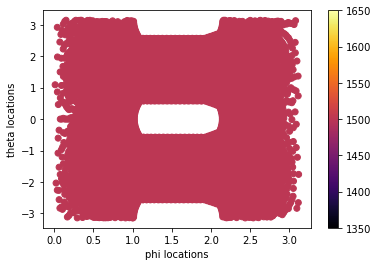

In [5]:
PARAMETERIZATION = "phi_theta"
FUNCTION_TYPE = "worst_case_TTA"
INTERPOLATION_METHOD = "nearest"
NUM_DETECTORS = 2
VIS = True

# This notation just takes the first two folders
# This makes it much faster to evaluate the optimization

source = SmokeSource(SMOKE_FOLDERS_LONG[0],
                     parameterization=PARAMETERIZATION,
                     vis=VIS,
                     alarm_threshold=ALARM_THRESHOLD)

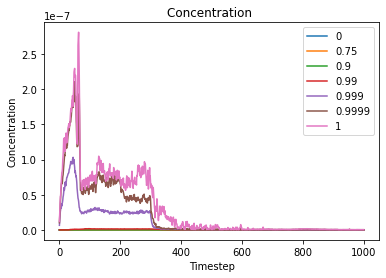

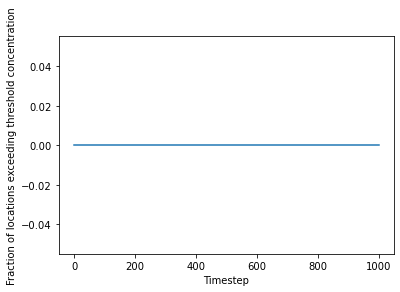

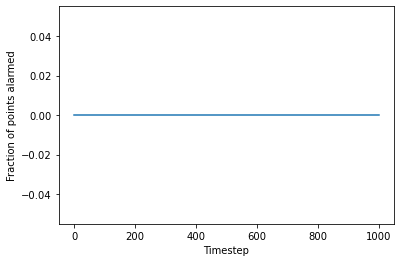

In [6]:
source.visualize_summary_statistics(quantiles=(0, 0.75, 0.9, 0.99, 0.999, 0.9999, 1))

Showing a 3D plot of time to alarm with final locations in green


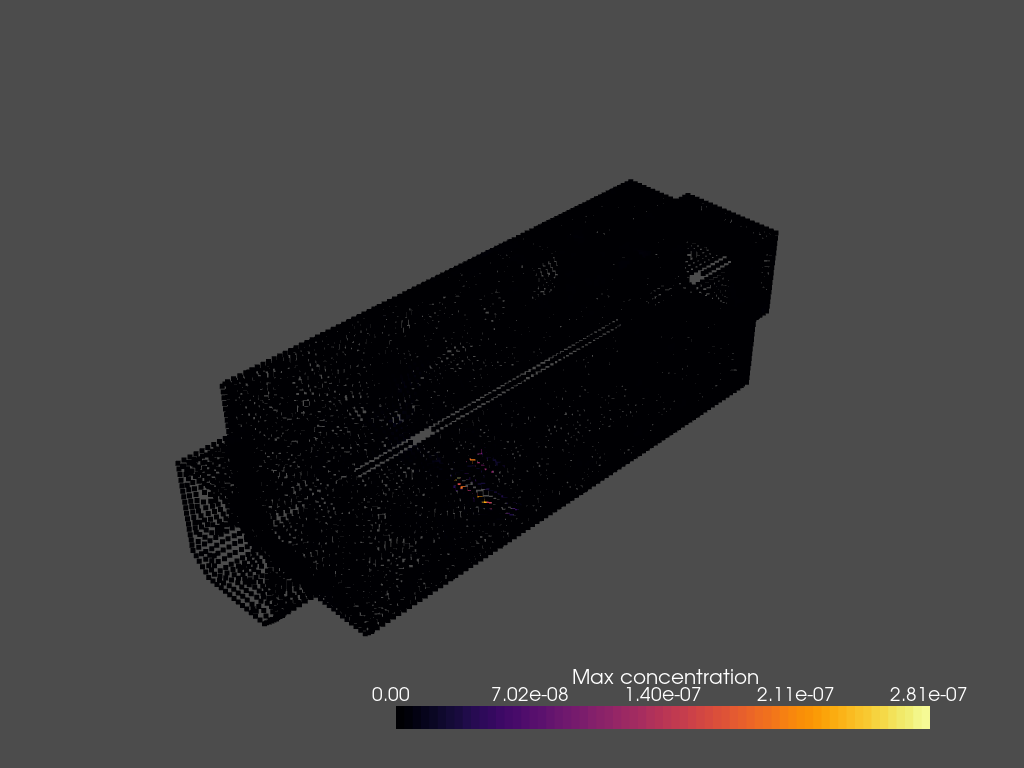

In [7]:
source.visualize_3D(which_metric="max_concentration")

divide by zero encountered in log10
Showing a 3D plot of time to alarm with final locations in green


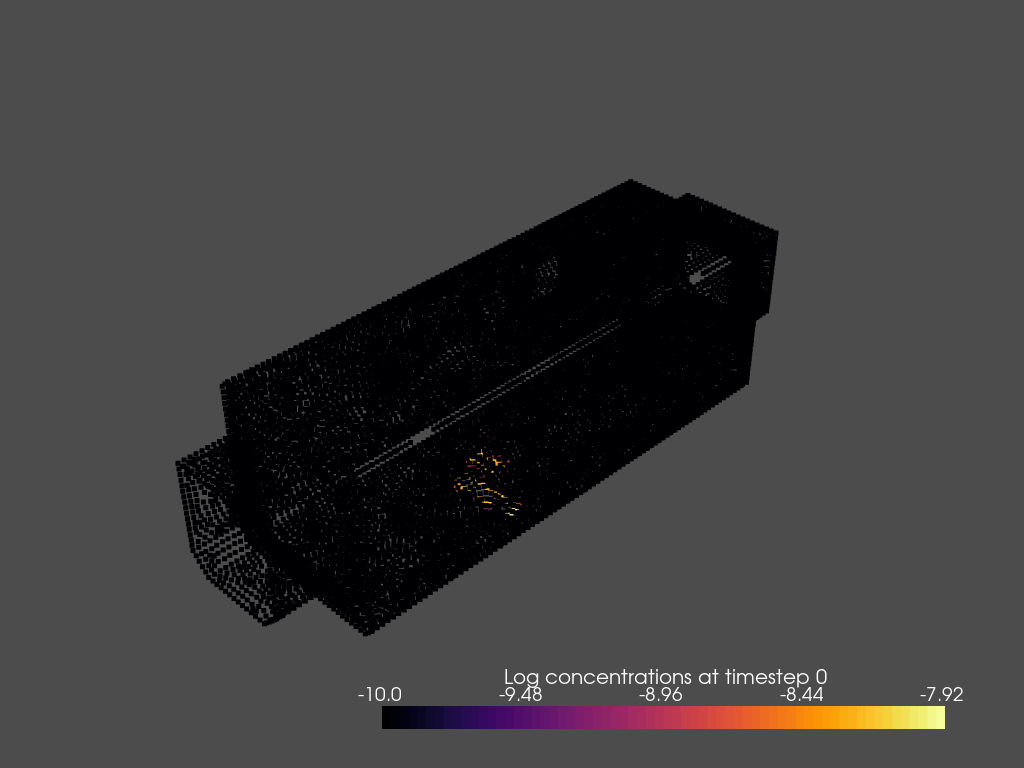

Showing a 3D plot of time to alarm with final locations in green


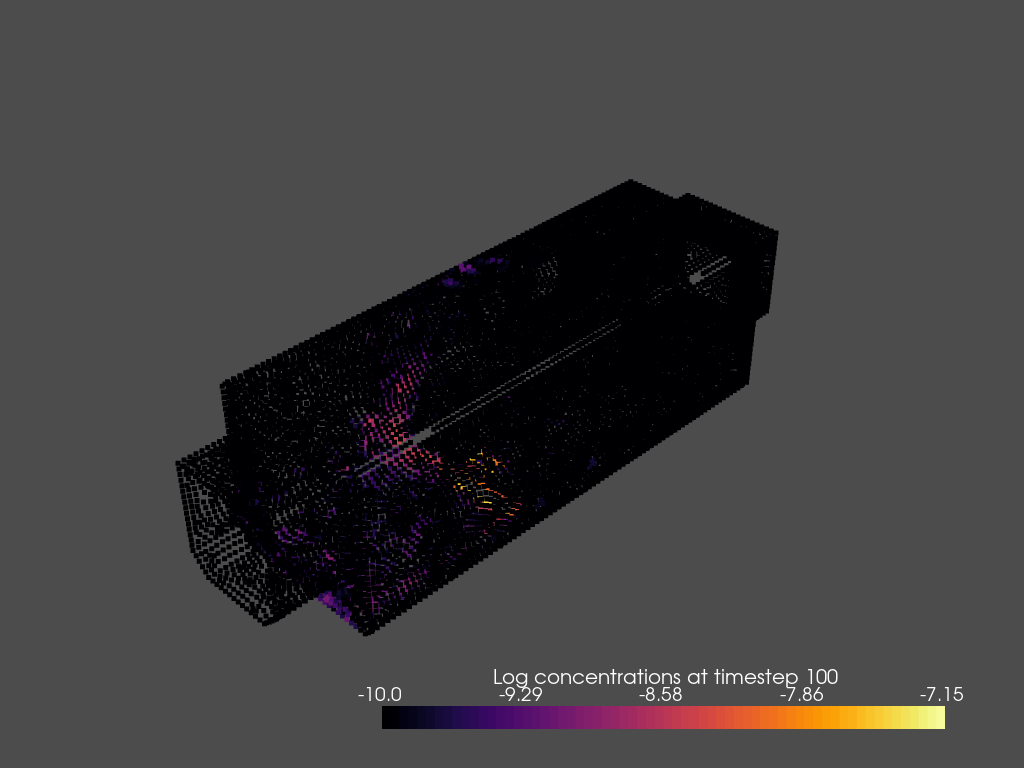

Showing a 3D plot of time to alarm with final locations in green


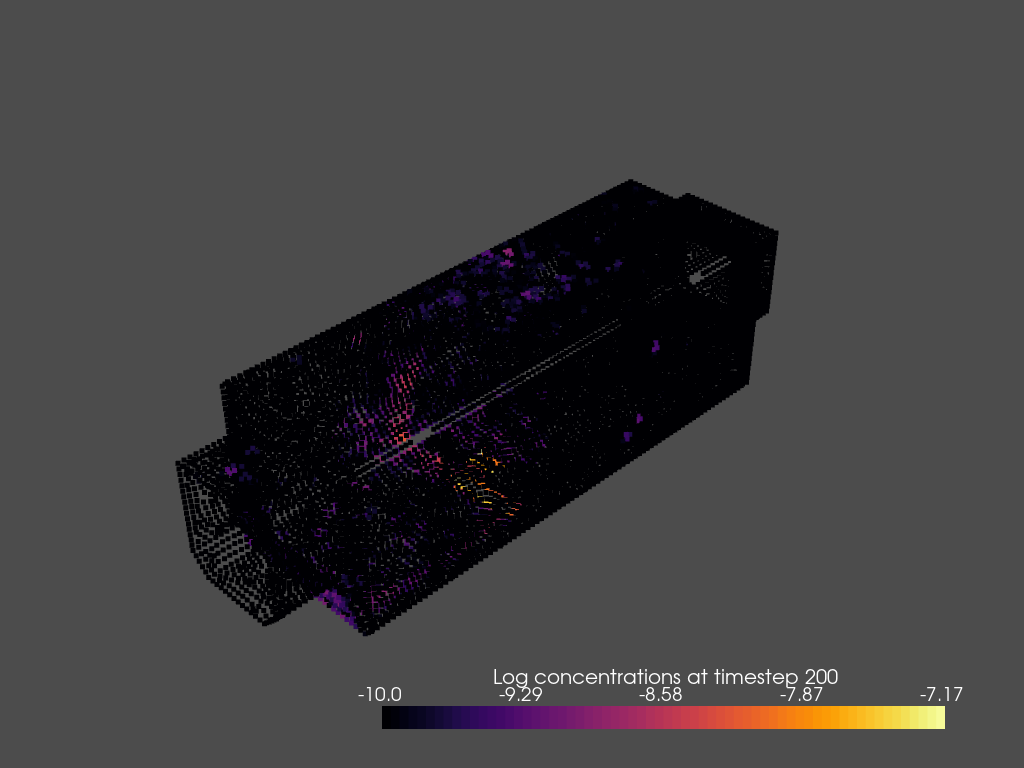

Showing a 3D plot of time to alarm with final locations in green


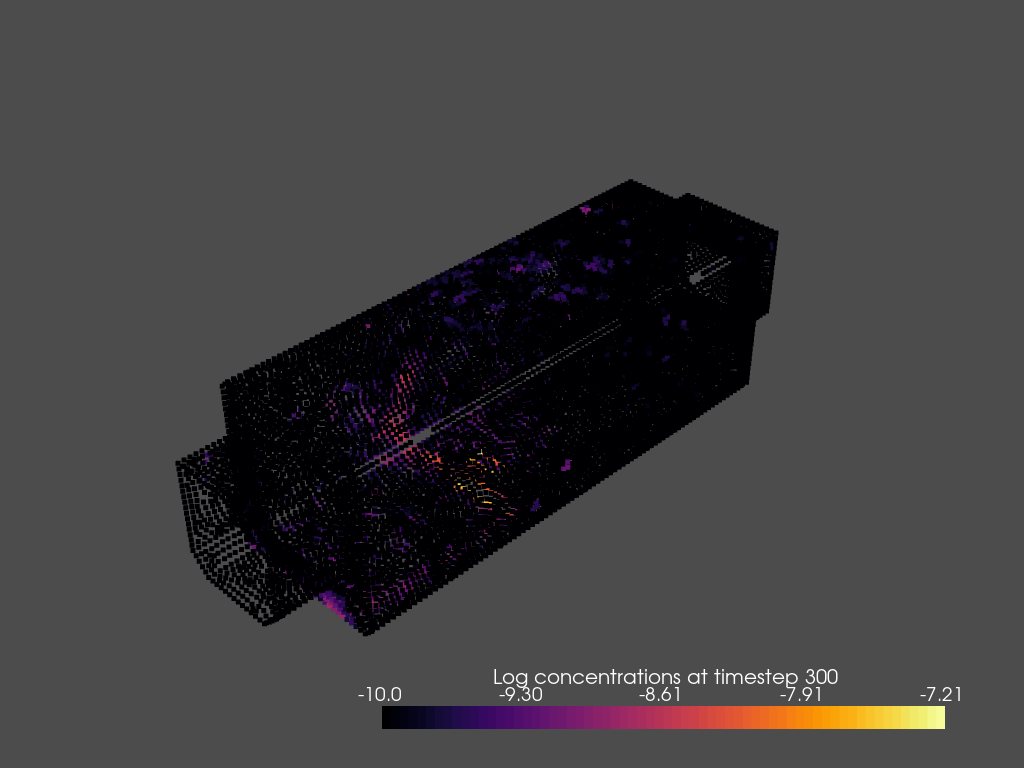

Showing a 3D plot of time to alarm with final locations in green


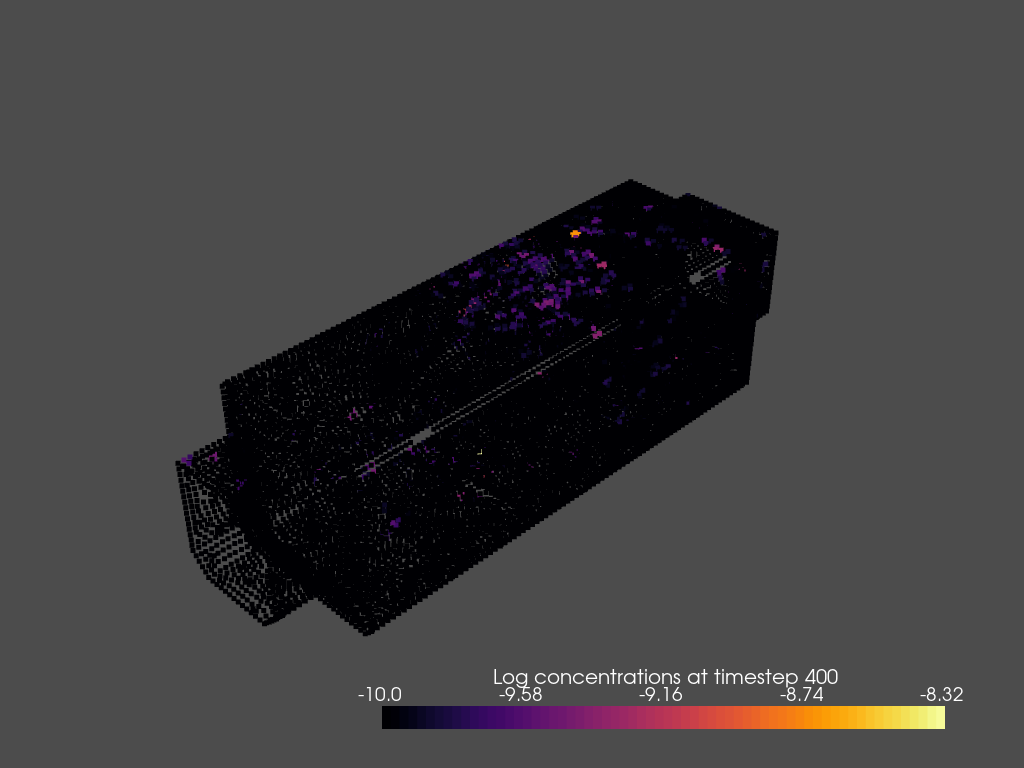

Showing a 3D plot of time to alarm with final locations in green


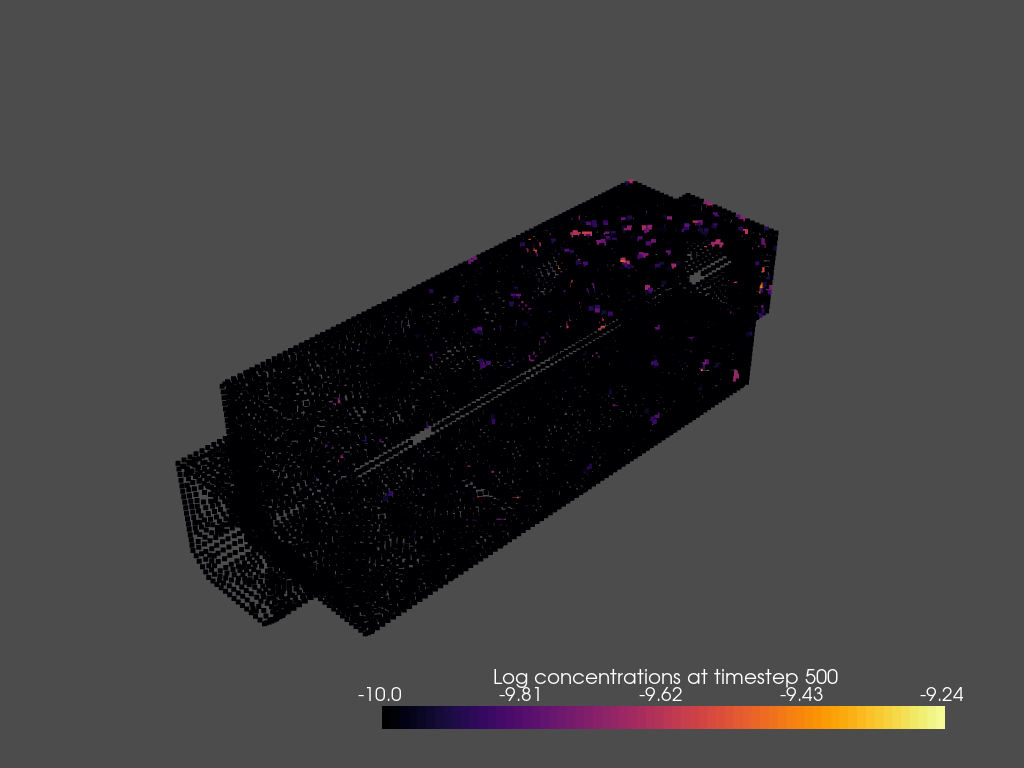

Showing a 3D plot of time to alarm with final locations in green


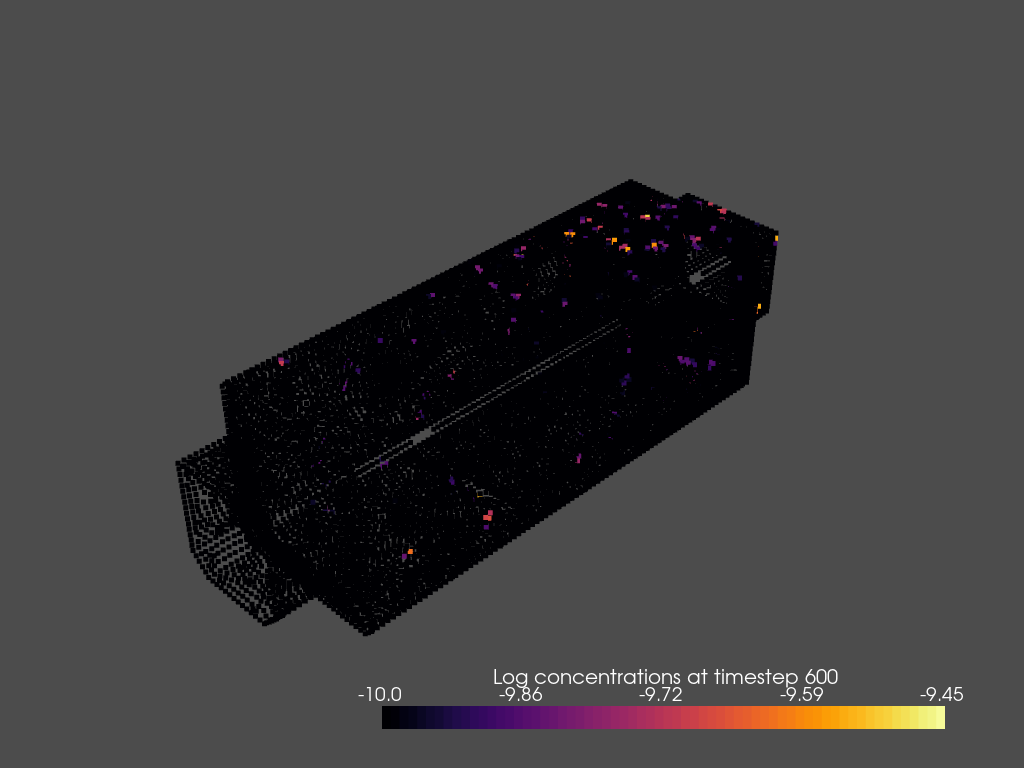

Showing a 3D plot of time to alarm with final locations in green


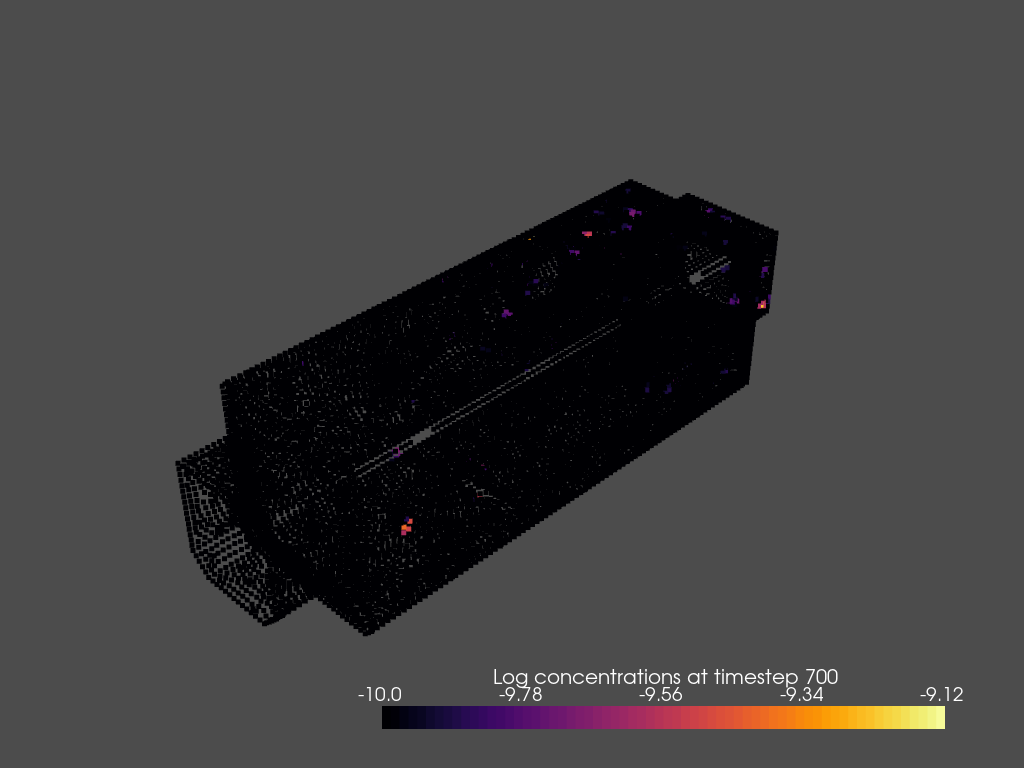

Showing a 3D plot of time to alarm with final locations in green


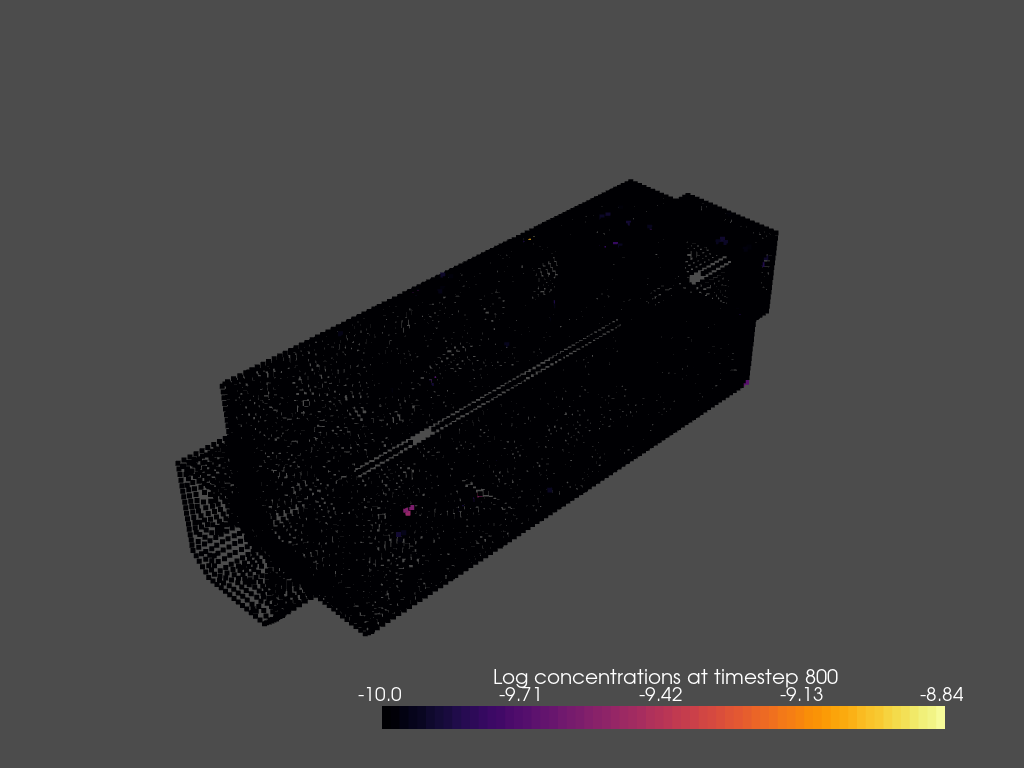

Showing a 3D plot of time to alarm with final locations in green


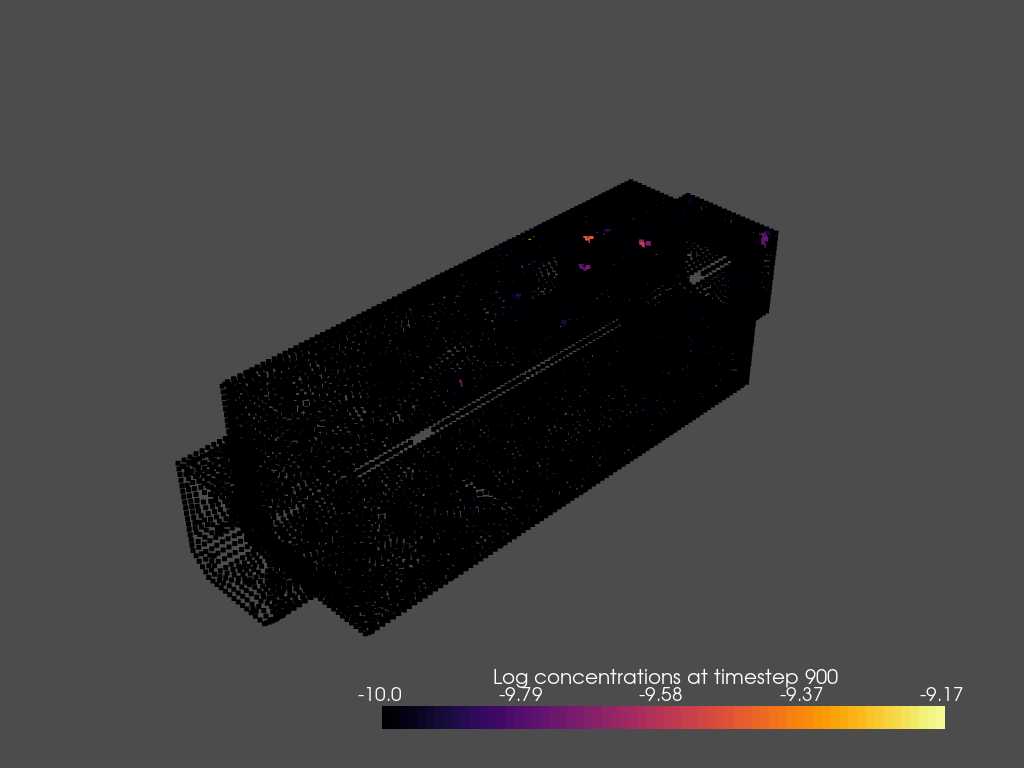

In [8]:
TIMESTEPS = range(0, 1000, 100)
for timestep in TIMESTEPS:
    source.visualize_3D(concentation_timestep=timestep, log_concentrations=True, log_lower_bound=-10)

Showing a 3D plot of time to alarm with final locations in green


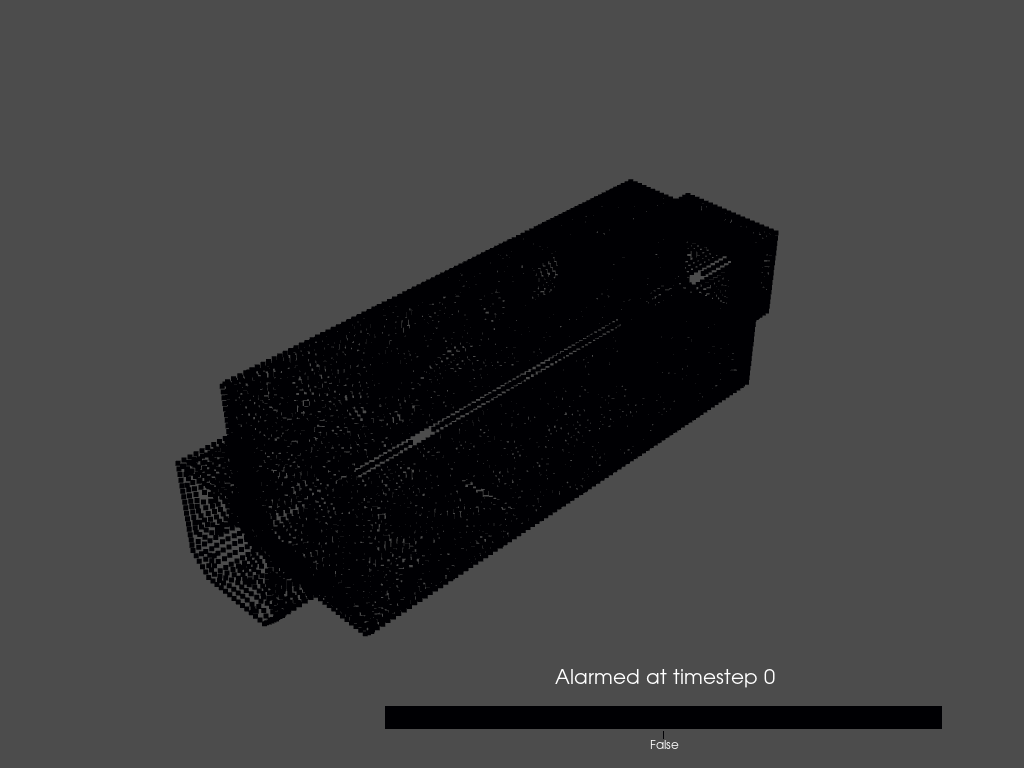

Showing a 3D plot of time to alarm with final locations in green


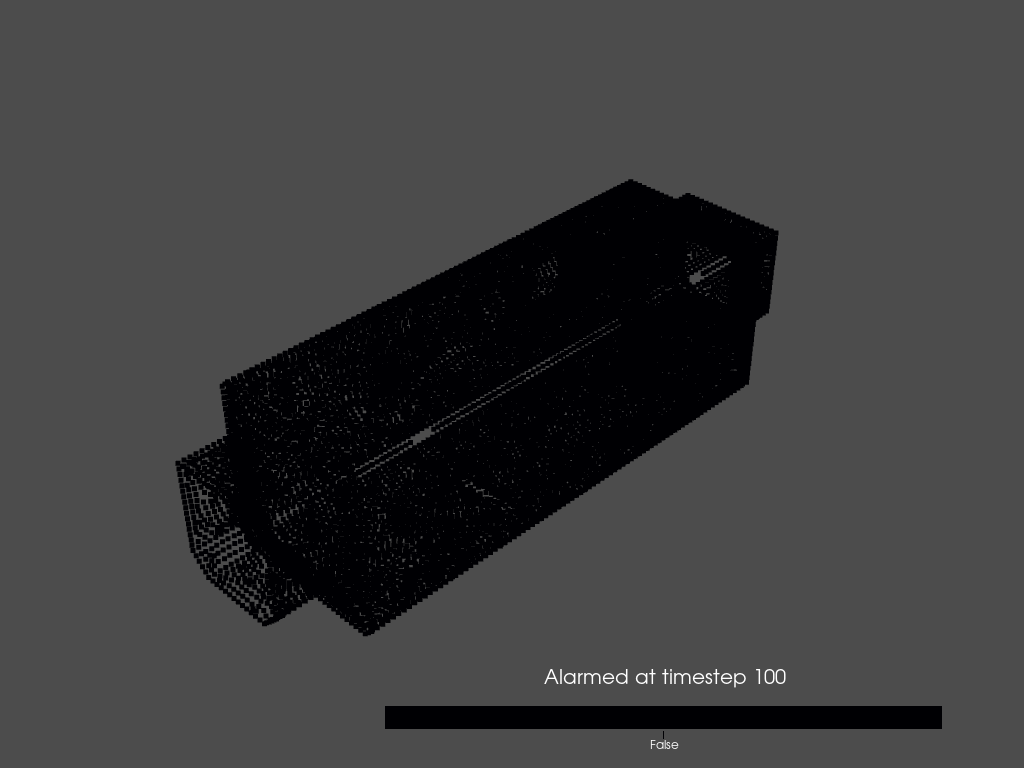

Showing a 3D plot of time to alarm with final locations in green


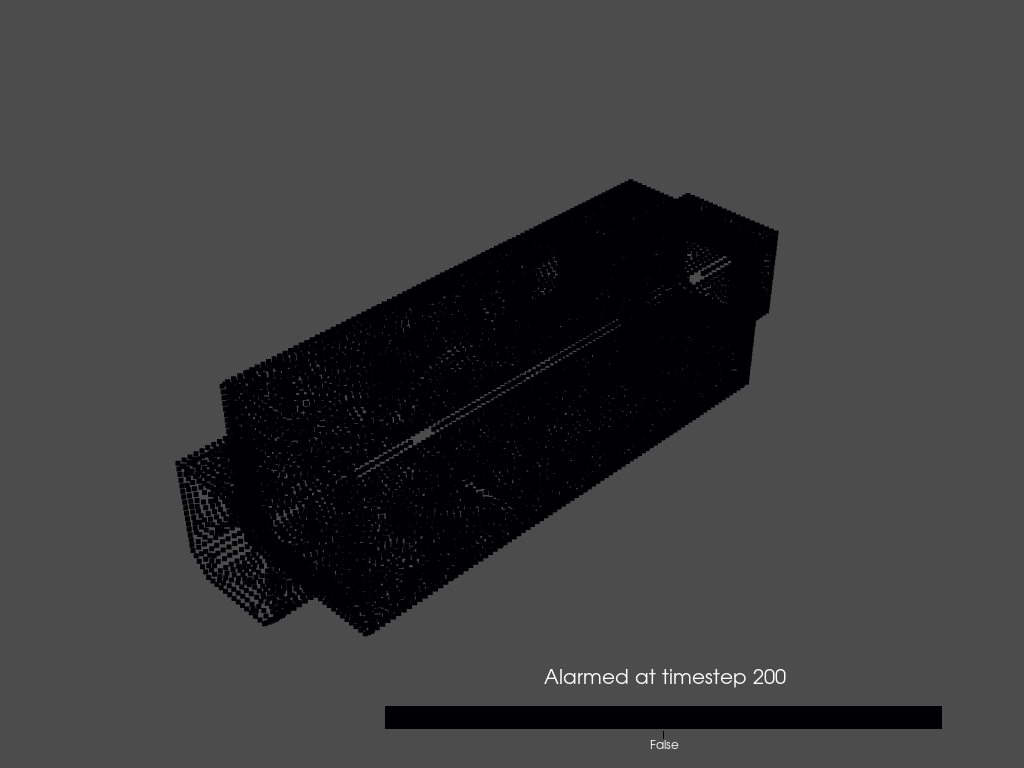

Showing a 3D plot of time to alarm with final locations in green


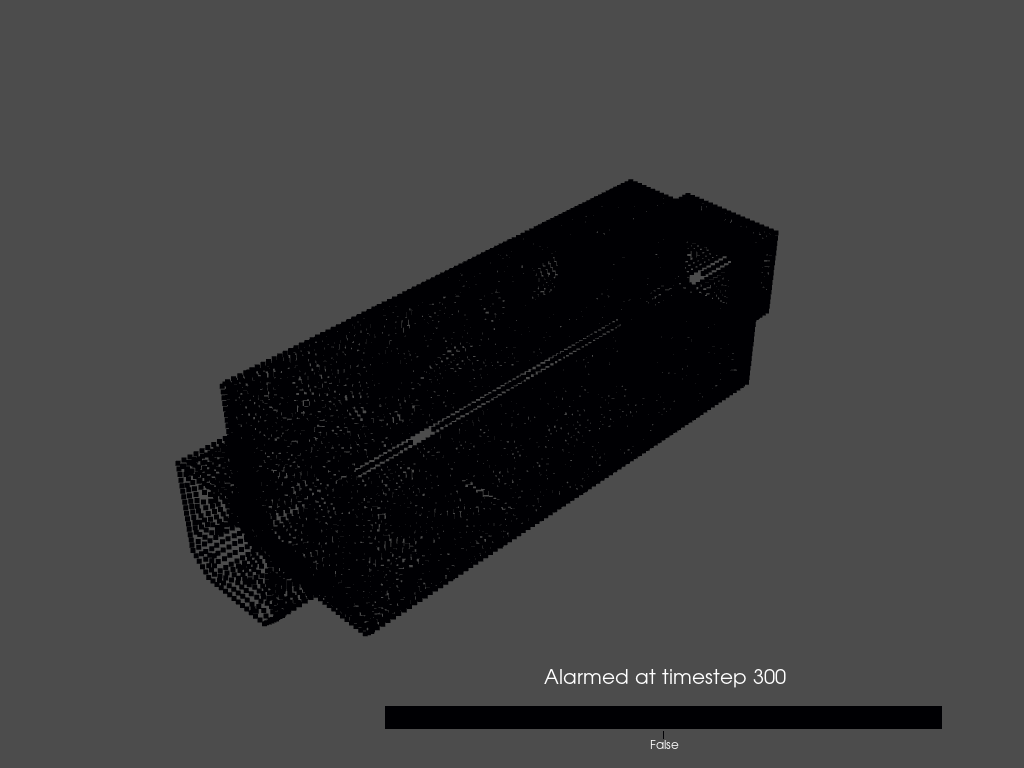

Showing a 3D plot of time to alarm with final locations in green


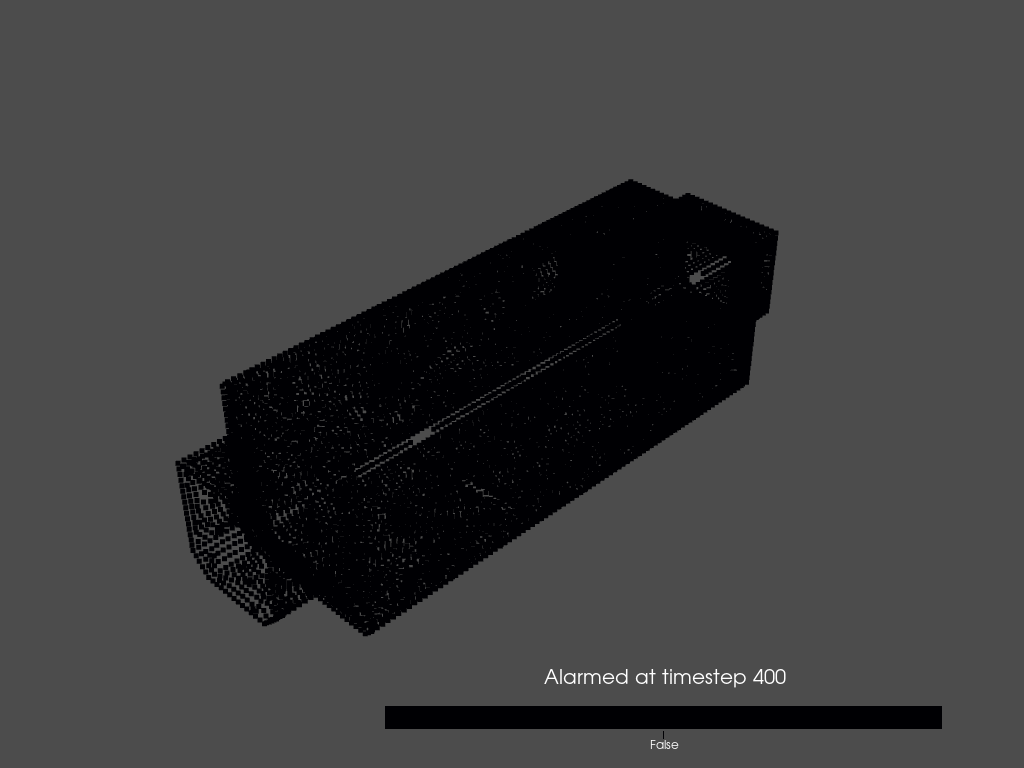

Showing a 3D plot of time to alarm with final locations in green


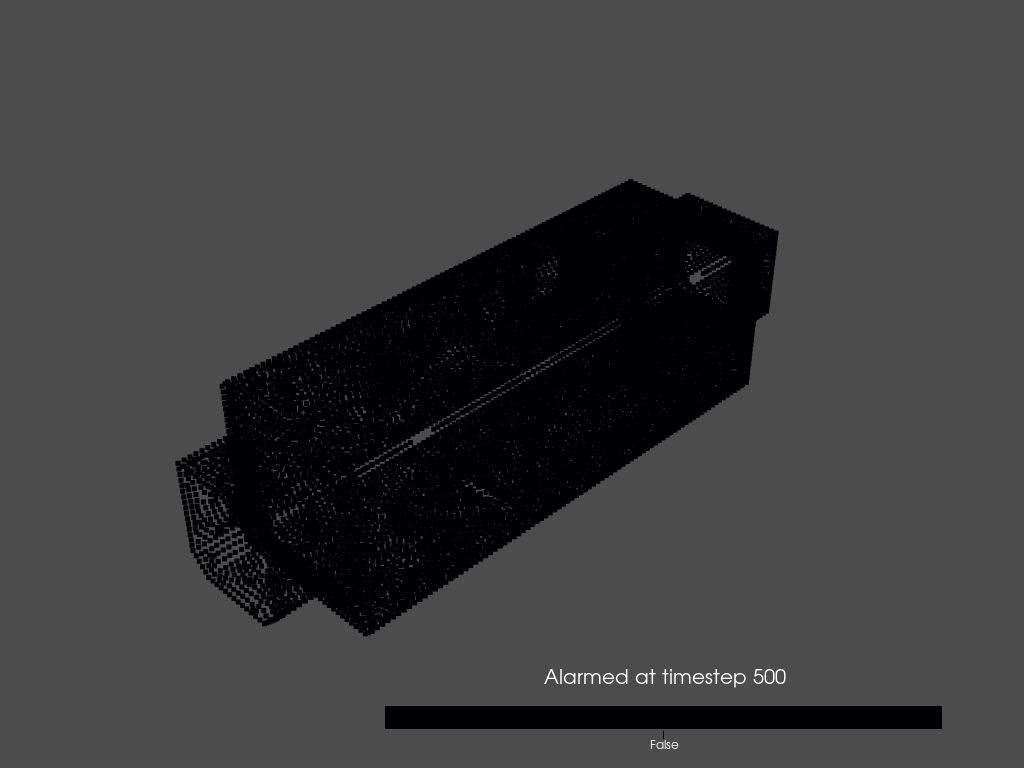

Showing a 3D plot of time to alarm with final locations in green


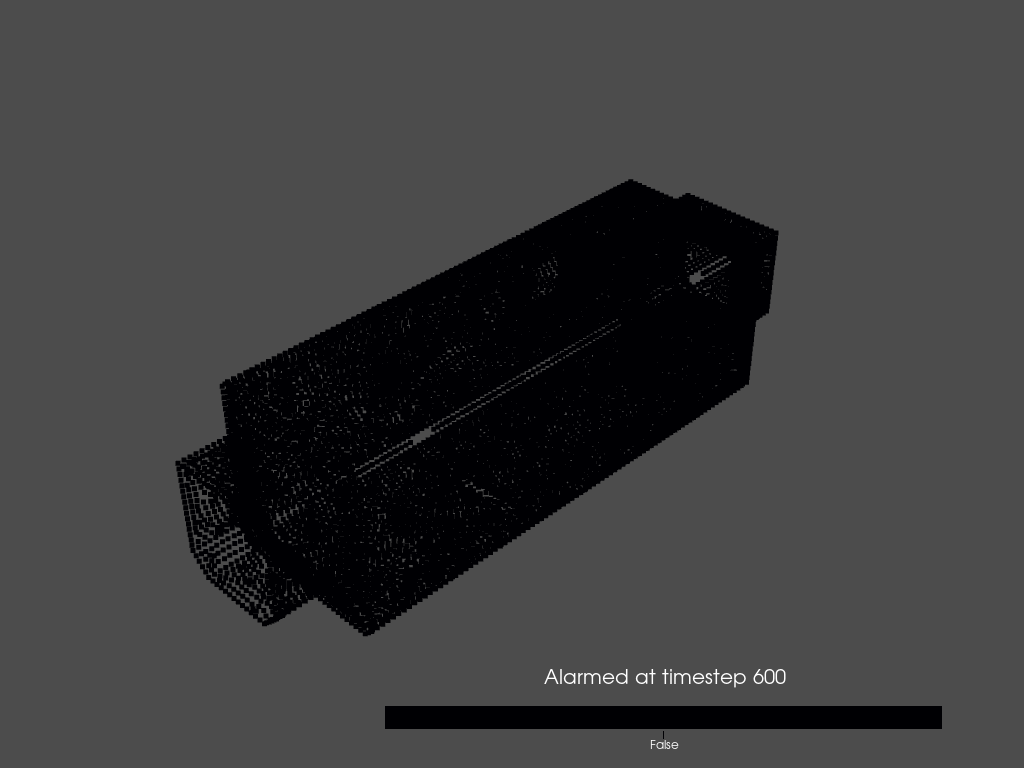

Showing a 3D plot of time to alarm with final locations in green


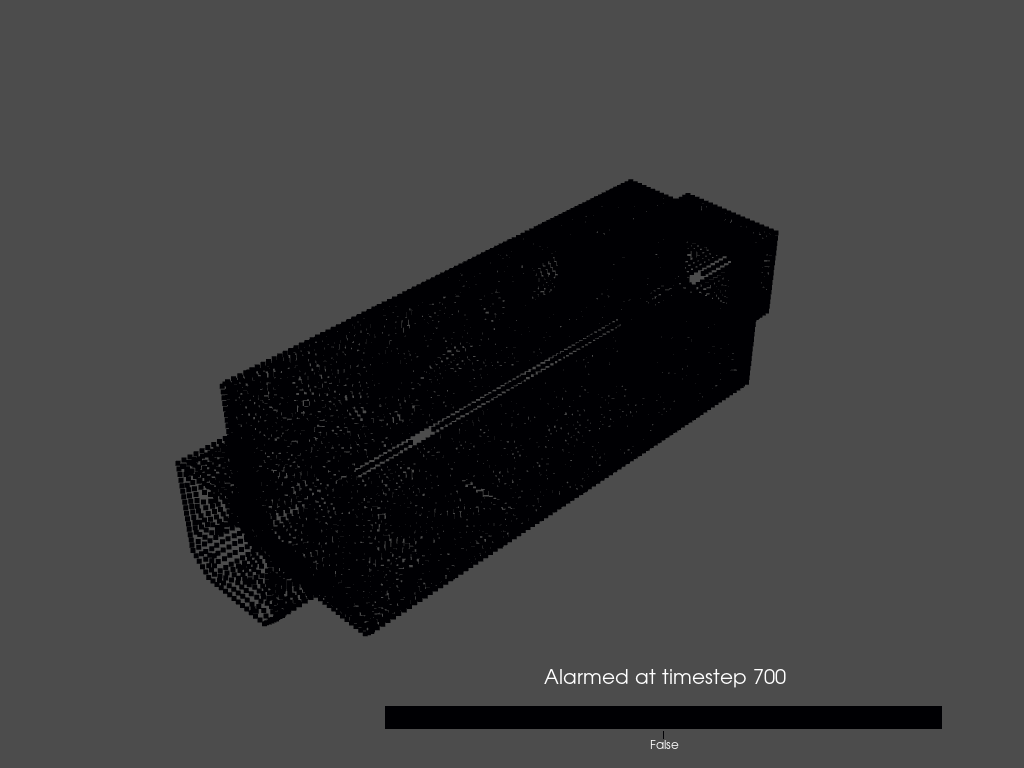

Showing a 3D plot of time to alarm with final locations in green


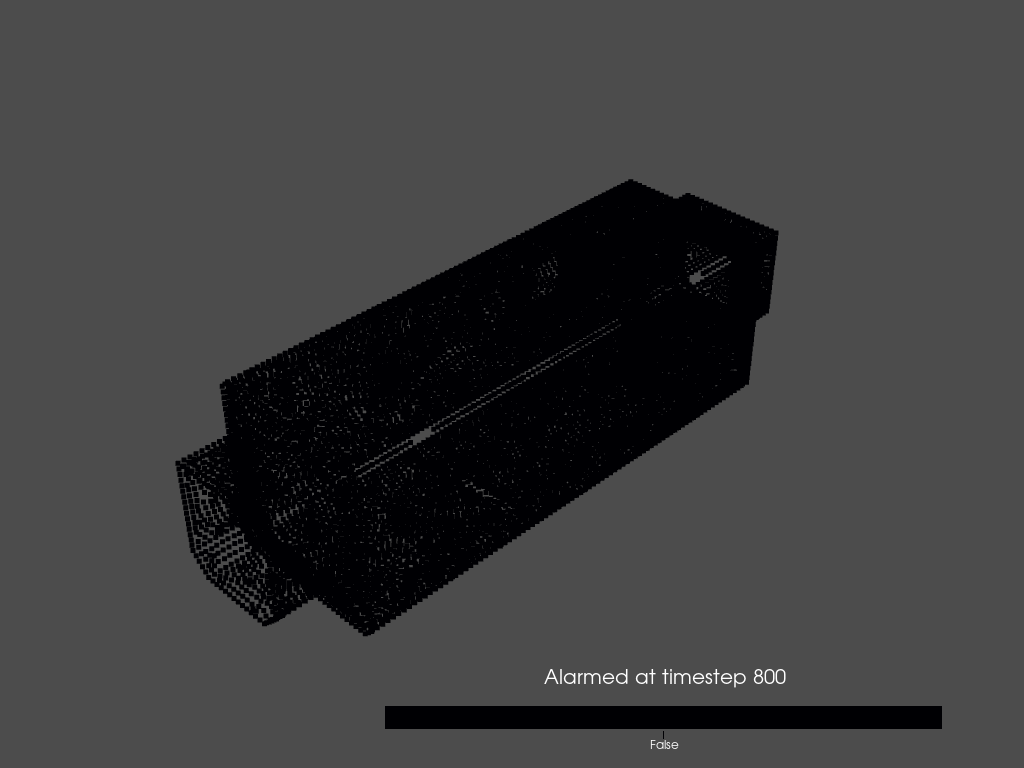

Showing a 3D plot of time to alarm with final locations in green


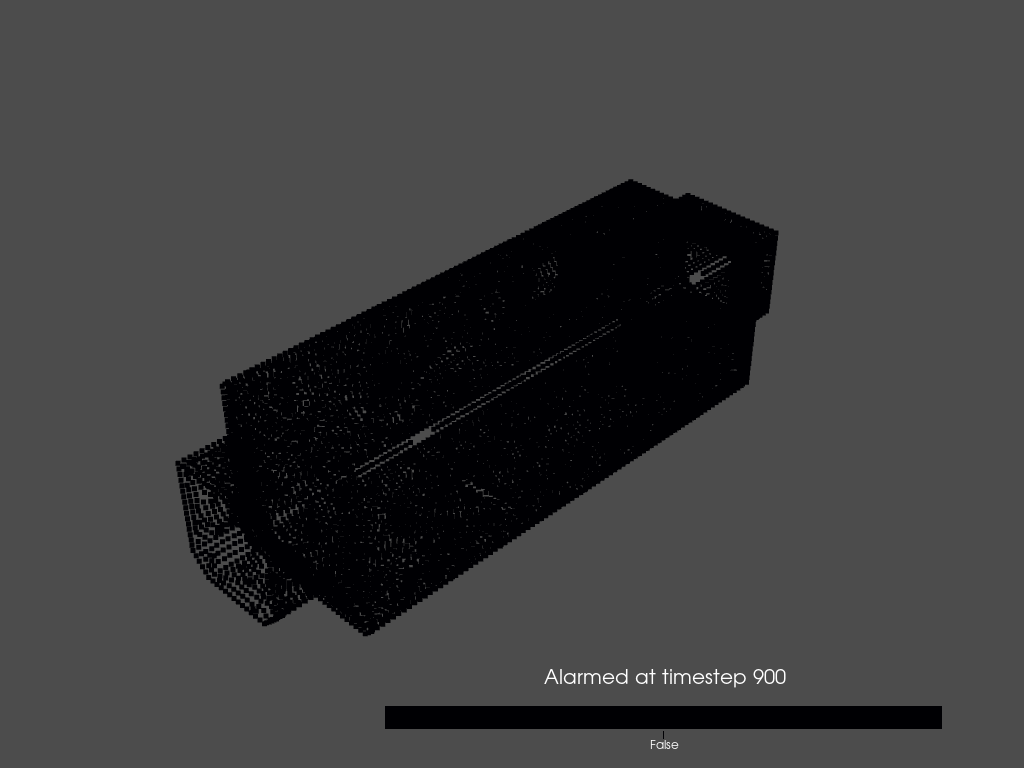

In [9]:
TIMESTEPS = range(0, 1000, 100)
for timestep in TIMESTEPS:
    source.visualize_3D(which_metric="alarmed", concentation_timestep=timestep)